In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

In [2]:
symbol = 'RELIANCE.NS'
start = '2007-01-01'
end = '2009-01-01'

tickerData = yf.Ticker(symbol)

# Read data 
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-01-02,281.588654,283.973880,280.550665,282.891693,4643207,0.0,0
2007-01-03,283.797236,285.100275,281.666009,283.697845,6015404,0.0,0
2007-01-04,284.901446,287.109964,282.030347,282.803314,12204290,0.0,0
2007-01-05,281.588732,289.760331,281.588732,284.492981,12304038,0.0,0
2007-01-08,285.784878,285.784878,279.733486,281.997223,8848507,0.0,0


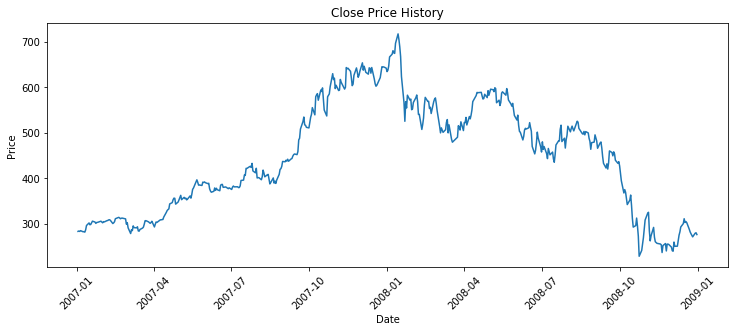

In [3]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
df['EMA20'] = ta.EMA(df.Close, timeperiod = 20)

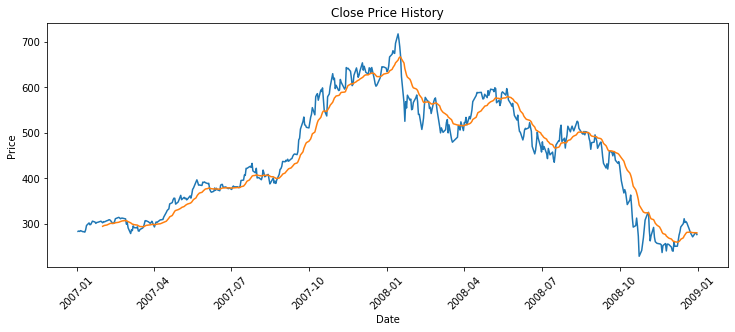

In [5]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.plot(df['EMA20'])
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
df['ATR'] = ta.ATR(df.High, df.Low, df.Close, timeperiod = 14)

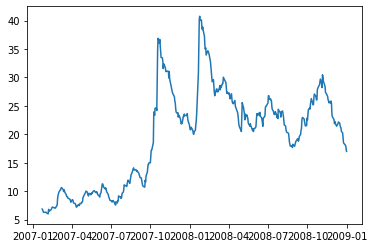

In [7]:
plt.plot(df['ATR'])

In [8]:
def buy_sell(df, alpha):
    BUY = []
    SELL = []
    ind = []
    i=0
    number_of_trades=0
    number_of_profitable_trades=0
    initial_money=100000
    profit=0
    while(i<len(df)):
        if(df['Close'][i-1]>df['High'][i-2] and df['Close'][i-2]>df['EMA20'][i-2] and df['Close'][i-3]<df['EMA20'][i-3]):
            number_of_trades=number_of_trades+1
            BUY.append(df['Open'][i])
            SELL.append(np.nan)
            buy_price = df['Open'][i]
            exit=df['ATR'][i]
            i=i+1
            while(df['Close'][i]<buy_price+exit*alpha and df['Close'][i]>buy_price-0.8*exit*alpha):
                if(i>=len(df)-1):
                    break
                BUY.append(np.nan)
                SELL.append(np.nan)
                i=i+1
            if(i<len(df)-1):
                if(df['Close'][i]>buy_price):
                    number_of_profitable_trades=number_of_profitable_trades+1
                profit+=df['Close'][i] - buy_price
                initial_money = initial_money/buy_price*df['Close'][i]
                BUY.append(np.nan)
                SELL.append(df['Close'][i])
                
        
        elif(df['Close'][i-1]<df['Low'][i-2] and df['Close'][i-2]<df['EMA20'][i-2] and df['Close'][i-3]>df['EMA20'][i-3] and i<len(df)):
            number_of_trades=number_of_trades+1
            SELL.append(df['Open'][i])
            BUY.append(np.nan)
            sell_price = df['Open'][i]
            exit=df['ATR'][i]
            i=i+1
            while(df['Close'][i]<sell_price+exit*alpha and df['Close'][i]>sell_price-0.8*exit*alpha):
                if(i>=len(df)-1):
                    break
                BUY.append(np.nan)
                SELL.append(np.nan)
                i=i+1
            if(i<len(df)-1):
                if(df['Close'][i]<sell_price):
                    number_of_profitable_trades=number_of_profitable_trades+1
                profit-=df['Close'][i] - sell_price
                initial_money = initial_money/df['Close'][i]*sell_price
                SELL.append(np.nan)
                BUY.append(df['Close'][i])
                
        
        else:
            BUY.append(np.nan)
            SELL.append(np.nan)
        
        
        i=i+1
        ind.append(i)

    return (BUY, SELL, ind, number_of_profitable_trades/number_of_trades, profit, initial_money-100000)

In [9]:
alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [10]:
max_profit_trades=0
for j in alpha:
    buy, sell, i, profit_trades, profit, profit2 = buy_sell(df, j)
    print(j, " ", profit_trades, " ", profit, "\n")

0.05   0.5909090909090909   73.00327864871446 

0.1   0.5909090909090909   73.00327864871446 

0.2   0.5909090909090909   73.00327864871446 

0.3   0.5909090909090909   71.39979354129258 

0.4   0.5909090909090909   68.15937606082383 

0.5   0.5454545454545454   43.20698348269883 

0.6   0.5   29.809153699873548 

0.7   0.5   97.04362205249197 

0.8   0.5   81.49863914233572 

0.9   0.5   56.76798728686697 

1.0   0.55   127.98023704272634 

1.1   0.55   137.25208762866384 

1.2   0.47368421052631576   36.521424773514866 

1.3   0.5263157894736842   46.81807812839537 

1.4   0.5263157894736842   66.13750561862975 

1.5   0.5   -6.721362992588695 

1.6   0.4375   -24.902142887407194 

1.7   0.36363636363636365   -65.99604211350214 

1.8   0.5   51.143963680027014 

1.9   0.5454545454545454   94.89430746791231 

2.0   0.6   109.6608662173075 



In [11]:
buy, sell, i, profit_trades, profit, profit2 = buy_sell(df, 2.0)

In [12]:
len(buy)

493

In [13]:
len(df)

494

In [14]:
buy.append(np.nan)
sell.append(np.nan)

In [15]:
df['BUY'] = buy
df['SELL'] = sell

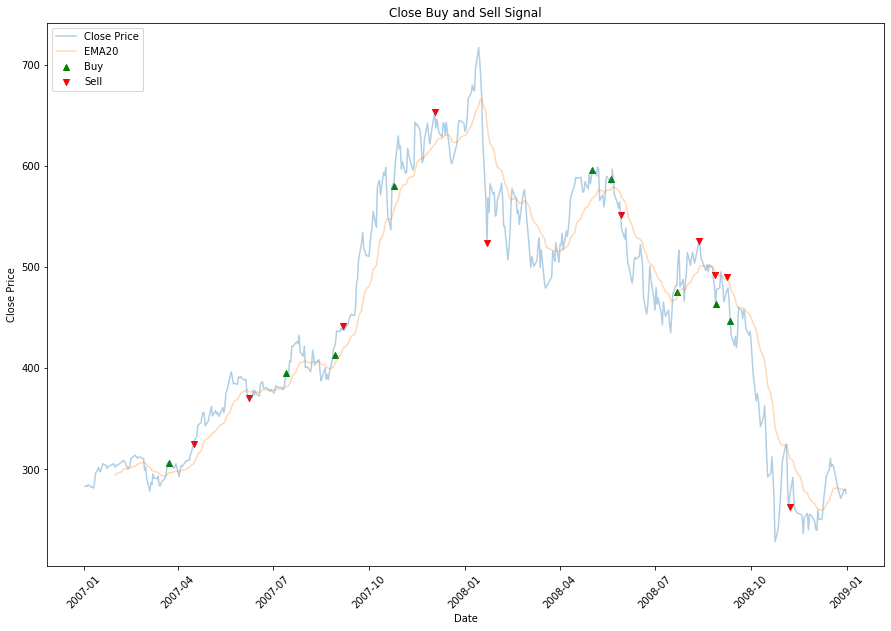

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(df.index,df['BUY'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['SELL'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.plot(df['EMA20'], label = 'EMA20', alpha=0.3)
plt.title('Close Buy and Sell Signal')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [17]:
profit*100

10966.08662173075

In [18]:
profit_trades*100

60.0

In [19]:
profit2

27168.266992833203